In [17]:
#dataset is Mental Health Client-Level Data from SAMHSA
#https://www.datafiles.samhsa.gov/dataset/mental-health-client-level-data-2021-mh-cld-2021-ds0001

In [2]:
!ls

google_colab_t-sne_mental_health_client-level_data.ipynb
mhcld_puf_2021.csv
plots
t-sne_mental_health_client-level_data.ipynb


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
data = pd.read_csv("mhcld_puf_2021.csv")

In [28]:
# Load data (deserialize)
with open('codebook_descriptions.pickle', 'rb') as handle:
    codebook_descriptions = pickle.load(handle)

In [52]:
data.columns

Index(['YEAR', 'AGE', 'EDUC', 'ETHNIC', 'RACE', 'GENDER', 'SPHSERVICE',
       'CMPSERVICE', 'OPISERVICE', 'RTCSERVICE', 'IJSSERVICE', 'MH1', 'MH2',
       'MH3', 'SUB', 'MARSTAT', 'SMISED', 'SAP', 'EMPLOY', 'DETNLF', 'VETERAN',
       'LIVARAG', 'NUMMHS', 'TRAUSTREFLG', 'ANXIETYFLG', 'ADHDFLG',
       'CONDUCTFLG', 'DELIRDEMFLG', 'BIPOLARFLG', 'DEPRESSFLG', 'ODDFLG',
       'PDDFLG', 'PERSONFLG', 'SCHIZOFLG', 'ALCSUBFLG', 'OTHERDISFLG',
       'STATEFIP', 'DIVISION', 'REGION', 'CASEID'],
      dtype='object')

In [53]:
codebook_descriptions['YEAR']

'Reporting period'

In [54]:
#for now, only include 0/1 data
#these are dignoses for the disorders
#there are sixteen of them
#need to one-hot encode categorical data
disorder_cols = ['TRAUSTREFLG','ANXIETYFLG','ADHDFLG','CONDUCTFLG','DELIRDEMFLG','BIPOLARFLG','DEPRESSFLG','ODDFLG','PDDFLG','SCHIZOFLG','PERSONFLG','ALCSUBFLG','OTHERDISFLG']
data = data[disorder_cols]

In [55]:
data.head()

,TRAUSTREFLG,ANXIETYFLG,ADHDFLG,CONDUCTFLG,DELIRDEMFLG,BIPOLARFLG,DEPRESSFLG,ODDFLG,PDDFLG,SCHIZOFLG,PERSONFLG,ALCSUBFLG,OTHERDISFLG
0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,1,0,0,0,0,1,0,0,0,0,0,0


In [56]:
len(data.columns)

13

In [74]:
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
#perform PCA without CAS connection
from sklearn import datasets, decomposition
#fill missing values
#X = data.fillna(data.mean())
#drop missing values
NUM_POINTS = 10_000
X = data.dropna()
X = X[:NUM_POINTS]
n_samples = X.shape[0]

In [58]:
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X.shape

(10000, 13)

In [59]:
#https://stackoverflow.com/questions/31909945/obtain-eigen-values-and-vectors-from-sklearn-pca
# We center the data and compute the sample covariance matrix
X_centered = X - np.mean(X, axis=0)
cov_matrix = np.dot(X_centered.T, X_centered) / n_samples
eigenvalues = pca.explained_variance_
for eigenvalue, eigenvector in zip(eigenvalues, pca.components_):    
    print(np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)))
    print(eigenvalue)

0.27221109857506076
0.27223832240729917
0.18329280681234048
0.18331113792612735
0.16080847736900755
0.16082455982498794


In [60]:
#create pandas dataframes from label and pca transformed data
X_transform = pca.transform(X)
transform_df = pd.DataFrame(X_transform,columns=['score0','score1','score2'])

In [61]:
X_transform.shape

(10000, 3)

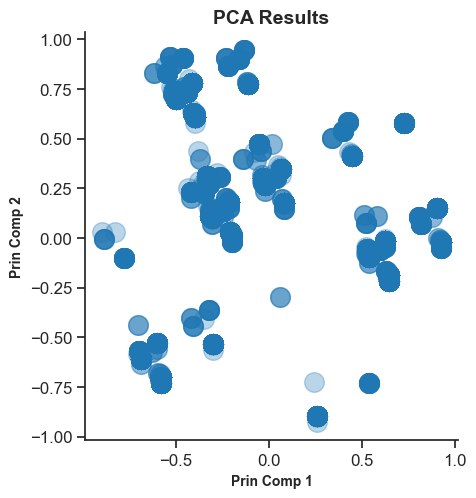

In [62]:
# Plot of PCA

# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot(x='score0',
           y='score1',
           data=transform_df,
           fit_reg=False,
           legend=True,
           #size=9,
           #hue='score2',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('PCA Results', weight='bold').set_fontsize('14')
plt.xlabel('Prin Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Prin Comp 2', weight='bold').set_fontsize('10')
plt.savefig('plots/pca_mental-health_client-level.png')

In [63]:
from sklearn.manifold import TSNE

In [66]:
tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=300)

In [67]:
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.011s...
[t-SNE] Computed neighbors for 10000 samples in 0.407s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.274216
[t-SNE] KL divergence after 300 iterations: 1.200988


In [68]:
tsne_df = pd.DataFrame(columns=['tsne-2d-one','tsne-2d-two'])
tsne_df['tsne-2d-one'] = tsne_results[:,0]
tsne_df['tsne-2d-two'] = tsne_results[:,1]

In [69]:
tsne_df.shape

(10000, 2)

In [70]:
#NOTE: 
#t-SNE depends heavily on perplexity
#ensure no id column got mixed in
tsne_df.head(10)

,tsne-2d-one,tsne-2d-two
0,-8.004092,7.215578
1,3.453912,-8.116302
2,-0.300372,10.928850
3,3.409581,-8.077015
4,24.212431,-0.233481
5,19.840359,-5.949504
6,10.114780,10.208488
7,13.878143,-12.523024
8,13.322720,8.609138
9,23.776491,-8.147474


In [75]:
#could just map 0/1 string to binary number
#too many categories. 2^7=128. need to reduce
#so create a label for those which are purely 1 for some disorder, and 0 for all others
#use separate category for uncategorized data
#use this as a hue to color the graph
labels = []
for row in data[:NUM_POINTS].iterrows():
  #labels.append(sum(row[1][i]*2**i for i in range(len(data.columns))))
  no_disorder = sum(row[1]) == 0
  pure_disorder = sum(row[1]) == 1
  multi_disorder = sum(row[1]) > 1
  if no_disorder:
    #labels.append(0)
    labels.append('no_disorder')
  if pure_disorder:
    #get the columns as a list
    #then get index of disorder with value 1
    #add 1 since 0 is already taken
    #labels.append(list(data.columns).index(row[1][row[1] == 1].index[0]) + 1)
    labels.append(row[1][row[1] == 1].index[0])
  if multi_disorder:
    #labels.append(len(data.columns)+1)
    labels.append('multi-disorder')

label_df = pd.DataFrame(labels,columns=['label'])

In [76]:
tsne_results_labeled = label_df.merge(tsne_df, left_index=True, right_index=True)

/var/folders/4d/rp7dhwss6znf18sks0v304d80000gn/T/ipykernel_5248/3351864616.py:3: UserWarning: 
The palette list has fewer values (10) than needed (14) and will cycle, which may produce an uninterpretable plot.
  plot = sns.scatterplot(


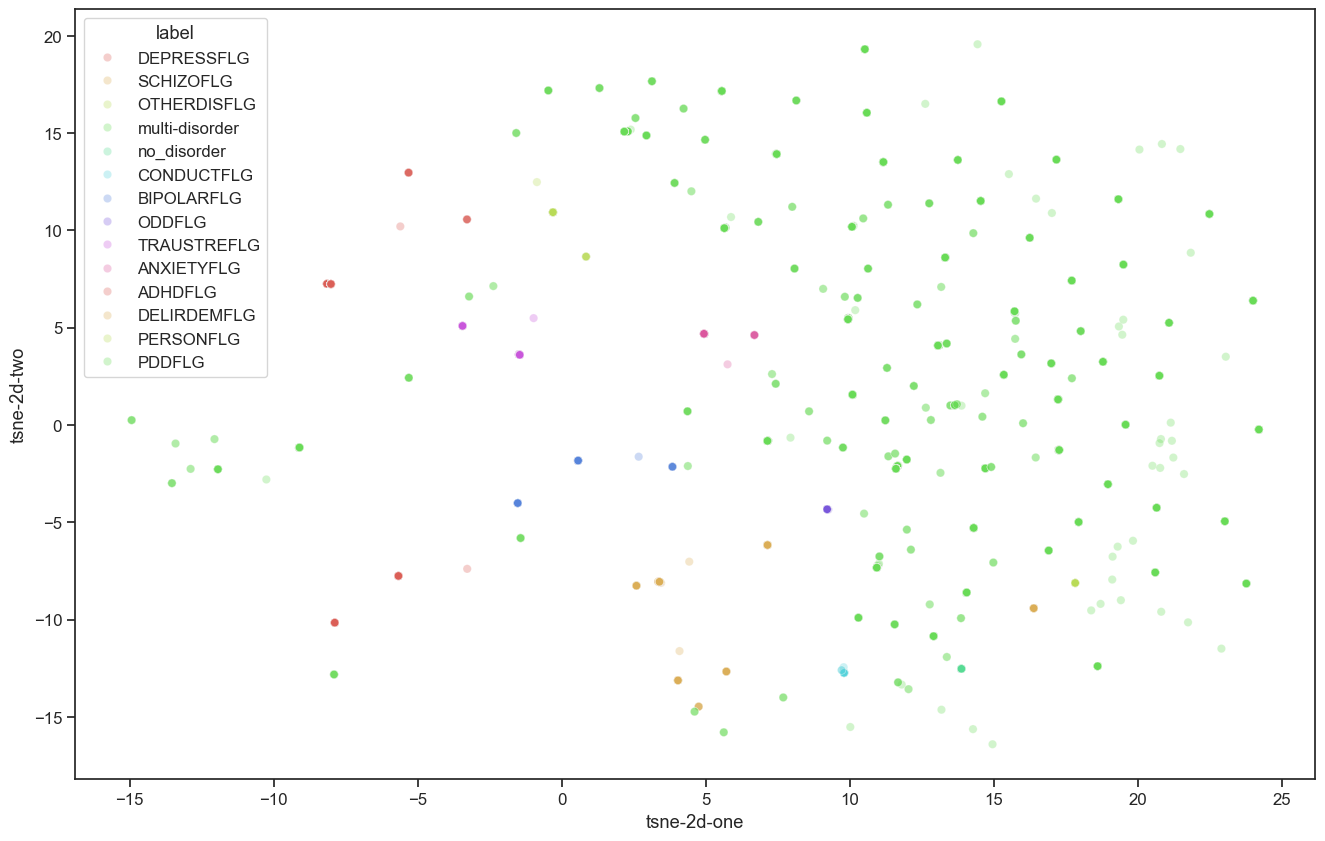

In [77]:
#plot the t-SNE results
plt.figure(figsize=(16,10))
plot = sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=tsne_results_labeled,
    legend="full",
    alpha=0.3
)

In [99]:
fig = plot.get_figure()
fig.savefig("./plots/tsne_plot_mental-health_client-level_data_perplexity=1000_num-data-points=30000_num_iters=500.png")